In [263]:
import pandas as pd
datos = pd.read_csv('U4_01_housing.csv')

In [264]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [265]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [266]:
datos.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [267]:
datos = datos.dropna()

In [268]:
datos.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [269]:
#obtener dummies de la comuna "ocean_proximity"

dummies = pd.get_dummies(datos['ocean_proximity'], dtype=int)

In [270]:
# hago la union con los dummies
datos = datos.join(dummies)

#Elimino la columna ocean_proximity
datos = datos.drop(['ocean_proximity'], axis=1)

<Axes: >

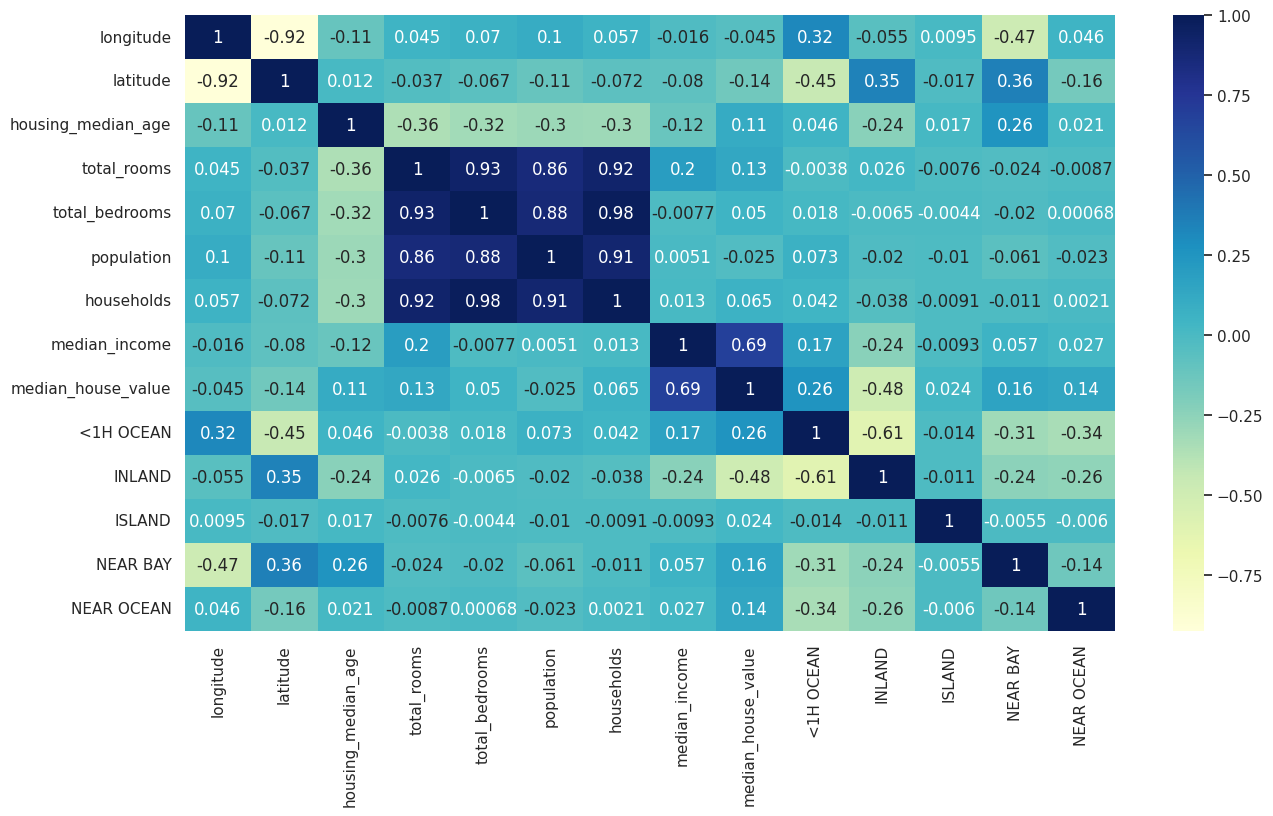

In [271]:
import seaborn as sb
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=datos.corr(), annot=True, cmap='YlGnBu' )

In [272]:
datos['median_house_value_median_income_rario'] = datos['median_house_value'] / datos['median_income']

In [273]:
# Entrenamiento de nuestro modelo
X = datos.drop(['median_house_value'], axis=1)
y = datos['median_house_value']

In [274]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [275]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor(max_depth = 10) # un nivel de profundiad

modelo.fit(X_train,y_train)

predicciones = modelo.predict(X_test)

In [276]:
predicciones

array([ 79709.75609756, 175100.        , 122578.125     , ...,
       184363.33333333, 122813.33333333, 256641.17647059])

In [277]:
# resultados con el modelo de arbol de decision
print(modelo.score(X_train, y_train))
print(modelo.score(X_test, y_test))

0.9982546309728354
0.9935321570632172


In [278]:
# buscar un maximo considerable

for i in range(1,16):
  modelo = DecisionTreeRegressor(max_depth = i) # un nivel de profundiad
  modelo.fit(X_train,y_train)
  predicciones = modelo.predict(X_test)
  resultado = modelo.score(X_test, y_test)
  print(f"para {i} el resultado fue: {resultado}")

para 1 el resultado fue: 0.2936977541817325
para 2 el resultado fue: 0.5403072767885757
para 3 el resultado fue: 0.7234924473893685
para 4 el resultado fue: 0.862132206323456
para 5 el resultado fue: 0.9212156093151256
para 6 el resultado fue: 0.9571561571974364
para 7 el resultado fue: 0.9755467162788204
para 8 el resultado fue: 0.9870735784035034
para 9 el resultado fue: 0.9914299317516868
para 10 el resultado fue: 0.9936490453327155
para 11 el resultado fue: 0.9950697288749865
para 12 el resultado fue: 0.9956905580424648
para 13 el resultado fue: 0.9954906688821923
para 14 el resultado fue: 0.9957460706288953
para 15 el resultado fue: 0.995323274940724
para 16 el resultado fue: 0.9957132581705537
para 17 el resultado fue: 0.9953635629242453
para 18 el resultado fue: 0.9959167694984988
para 19 el resultado fue: 0.9957798239983278
para 20 el resultado fue: 0.9953825529689871


In [ ]:
#graficar el modelo para ver la relacion entre las caracteristicas
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,80))
plot_tree(
    modelo,
    feature_names = X_train.columns,filled=True, label="None"
)

[Text(0.7100927266716154, 0.9761904761904762, 'median_income <= 5.045\n13403702891.773\n16346\n207070.285'),
 Text(0.49646116965702247, 0.9285714285714286, 'median_house_value_median_income_rario <= 64574.738\n8397682039.815\n12922\n173658.464'),
 Text(0.27701687859421886, 0.8809523809523809, 'median_income <= 3.16\n3124825951.651\n9133\n138539.724'),
 Text(0.13600035043169875, 0.8333333333333334, 'median_house_value_median_income_rario <= 44456.85\n1297877032.257\n4346\n102027.68'),
 Text(0.06869187273203278, 0.7857142857142857, 'median_income <= 2.331\n494832926.442\n2339\n80141.64'),
 Text(0.033535642621829516, 0.7380952380952381, 'median_house_value_median_income_rario <= 37193.416\n208411179.944\n1049\n65037.843'),
 Text(0.01404291252817456, 0.6904761904761905, 'median_income <= 1.799\n106113690.901\n673\n58631.496'),
 Text(0.0031269412441614166, 0.6428571428571429, 'median_house_value_median_income_rario <= 29215.834\n62548325.271\n213\n51254.451'),
 Text(0.0005057842711275255, 0